In [14]:
import numpy as np
import matplotlib.pyplot as plt

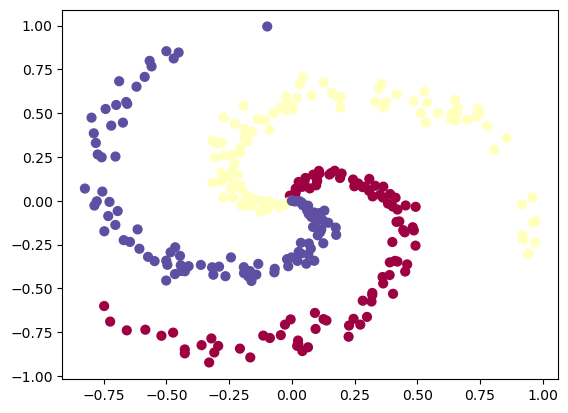

In [15]:
N = 100
D = 2
K = 3
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N)
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
import torch

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'mps'

In [18]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

In [25]:
import torch.nn as nn

class NeuralNetwork01(nn.Module):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(in_features=input, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=output)
        )

    def forward(self, x):
        return self.layer(x)
    
model_01 = NeuralNetwork01(input=X_train.shape[1], hidden=32, output=3).to(device)
model_01

NeuralNetwork01(
  (layer): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_01.parameters(), lr=0.001)

Epoch: 0 | Training Loss: 1.11 | Testing Loss: 1.10 | Training Accuracy: 33.33 | Testing Accuracy: 33.33
Epoch: 10 | Training Loss: 1.08 | Testing Loss: 1.08 | Training Accuracy: 33.33 | Testing Accuracy: 33.33
Epoch: 20 | Training Loss: 1.05 | Testing Loss: 1.05 | Training Accuracy: 56.25 | Testing Accuracy: 60.00
Epoch: 30 | Training Loss: 1.03 | Testing Loss: 1.03 | Training Accuracy: 60.83 | Testing Accuracy: 65.00
Epoch: 40 | Training Loss: 1.00 | Testing Loss: 1.00 | Training Accuracy: 63.33 | Testing Accuracy: 63.33
Epoch: 50 | Training Loss: 0.97 | Testing Loss: 0.97 | Training Accuracy: 65.00 | Testing Accuracy: 63.33
Epoch: 60 | Training Loss: 0.93 | Testing Loss: 0.94 | Training Accuracy: 61.67 | Testing Accuracy: 60.00
Epoch: 70 | Training Loss: 0.89 | Testing Loss: 0.90 | Training Accuracy: 60.83 | Testing Accuracy: 60.00
Epoch: 80 | Training Loss: 0.85 | Testing Loss: 0.87 | Training Accuracy: 59.17 | Testing Accuracy: 55.00
Epoch: 90 | Training Loss: 0.81 | Testing Loss:

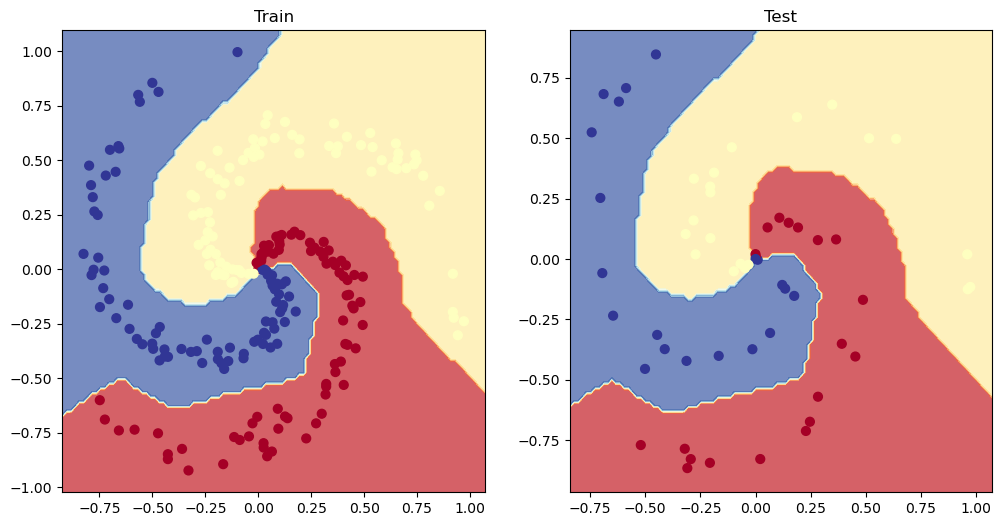

In [27]:
from helper_functions import accuracy_fn, plot_decision_boundary
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_01.train()
    y_logits = model_01(X_train)
    loss_train = criterion(y_logits, y_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    accuracy_train = accuracy_fn(y_train, y_preds)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    with torch.inference_mode():
        model_01.eval()
        y_logits = model_01(X_test)
        loss_test = criterion(y_logits, y_test)
        y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
        accuracy_test = accuracy_fn(y_test, y_preds)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Training Loss: {loss_train:.2f} | Testing Loss: {loss_test:.2f} | Training Accuracy: {accuracy_train:.2f} | Testing Accuracy: {accuracy_test:.2f}')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_01, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_01, X_test, y_test)

In [28]:
model_01.state_dict()

OrderedDict([('layer.0.weight',
              tensor([[ 0.3416,  1.5236],
                      [-0.9578,  1.0820],
                      [-0.5711,  0.7196],
                      [-0.7588,  0.9956],
                      [ 1.5318, -1.3648],
                      [ 1.3714,  0.4026],
                      [ 0.9320,  0.8283],
                      [ 0.6453, -0.5902],
                      [ 0.9296,  0.9326],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-1.6561, -1.2665],
                      [-0.4059, -1.1417],
                      [ 0.5659, -1.2975],
                      [ 1.2120, -1.2210],
                      [ 1.3262, -0.0440],
                      [-0.2192,  0.4266],
                      [-0.2812,  1.1323],
                      [ 0.0773, -0.2230],
                      [ 0.5860, -0.5885],
                      [ 1.0086,  0.9819],
                      [ 0.7934, -0.5944],
  